In [302]:
import pandas as pd
import json

pfad = './DATA/SystemLoad_Weather/nextbike_weather_data.json'

with open(pfad, 'r') as f:
    data = json.load(f)

df_LoadWeather = pd.DataFrame(data)
print(df_LoadWeather.head())


print(df_LoadWeather)

                    timestamp  booked_bikes  set_point_bikes  available_bikes  \
0  2025-07-19T01:37:18.938751          18.0           5641.0           4044.0   
1  2025-07-19T01:37:29.174947          18.0           5641.0           4044.0   
2  2025-07-19T01:37:39.427555          20.0           5641.0           4044.0   
3  2025-07-19T01:37:49.665509          21.0           5641.0           4046.0   
4  2025-07-19T01:37:59.898582          21.0           5641.0           4044.0   

                           current_weather_condition  \
0  {'FeelsLikeC': '21', 'FeelsLikeF': '70', 'clou...   
1  {'FeelsLikeC': '21', 'FeelsLikeF': '70', 'clou...   
2  {'FeelsLikeC': '21', 'FeelsLikeF': '70', 'clou...   
3  {'FeelsLikeC': '21', 'FeelsLikeF': '70', 'clou...   
4  {'FeelsLikeC': '21', 'FeelsLikeF': '70', 'clou...   

                                  weather_20_current  
0  {'time': '2025-07-19T01:30', 'interval': 900, ...  
1  {'time': '2025-07-19T01:30', 'interval': 900, ...  
2  {'time':

In [262]:
!pip install astral



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


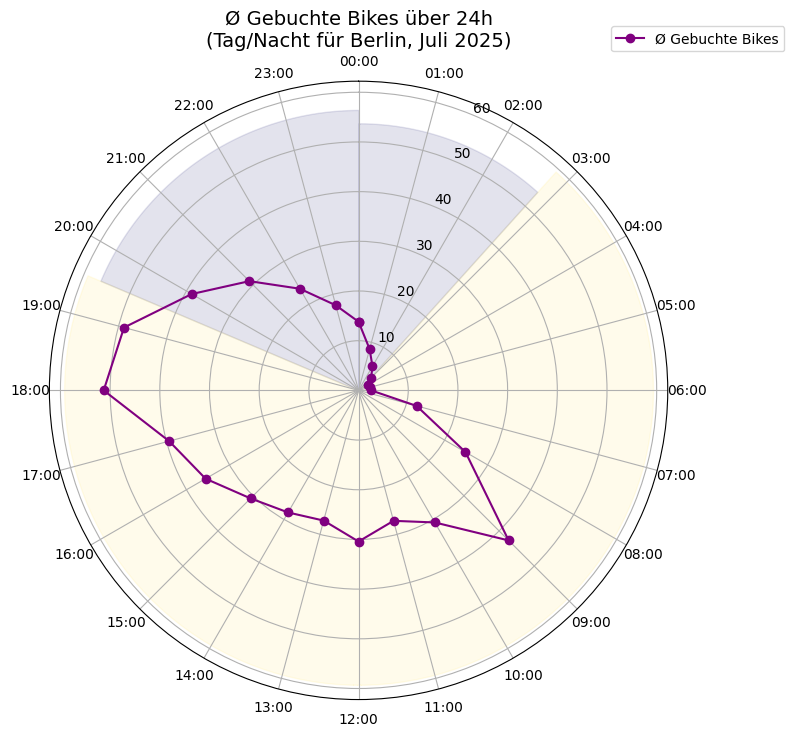

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# Beispiel: Lade deine Daten (hier angenommen als df)
# df = pd.read_json('deine_datei.json')
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Falls das DataFrame df schon da ist:
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60

# Durchschnittlich gebuchte Bikes pro Stunde ermitteln
hourly = df_LoadWeather.groupby('hour')['booked_bikes'].mean()

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset  = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
r = [hourly.get(h, 0) for h in range(24)]

# Für geschlossenen Kreis
theta_closed = np.append(theta, theta[0])
r_closed = r + [r[0]]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
ax.plot(theta_closed, r_closed, color='purple', marker='o', label='Ø Gebuchte Bikes')

# Tag-/Nacht-Bereich einfärben
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, ax.get_ylim()[1], color='midnightblue', alpha=0.12)
ax.fill_between(night2, 0, ax.get_ylim()[1], color='midnightblue', alpha=0.12)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, ax.get_ylim()[1], color='gold', alpha=0.08)

# Uhrzeit-Labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels([f"{h:02d}:00" for h in range(24)], fontsize=10)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h\n(Tag/Nacht für Berlin, Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

# Sonnenzeiten anzeigen
print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3946073885.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)


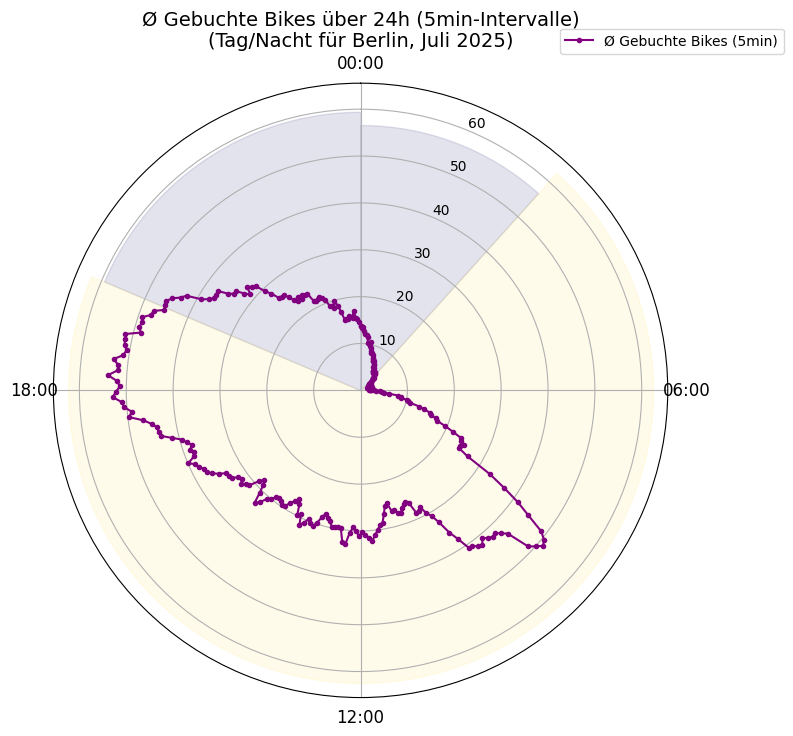

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
# Zeitspalte in datetime konvertieren

df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60

# Durchschnitt alle 5 Minuten berechnen
bins = np.arange(0, 24, 5/60)  # 5-Minuten-Intervalle
labels = bins[:-1] + (5/120)   # Mittelpunkt jedes Intervalls

df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)
hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
angles = np.linspace(0, 2 * np.pi, len(hourly), endpoint=False)
r = hourly.values
angles_closed = np.append(angles, angles[0])
r_closed = np.append(r, r[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
ax.plot(angles_closed, r_closed, color='purple', marker='.', label='Ø Gebuchte Bikes (5min)')

# Tag-/Nacht-Bereich einfärben
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, ax.get_ylim()[1], color='midnightblue', alpha=0.12)
ax.fill_between(night2, 0, ax.get_ylim()[1], color='midnightblue', alpha=0.12)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, ax.get_ylim()[1], color='gold', alpha=0.08)

# Uhrzeit-Labels (nur 4 Stück)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht für Berlin, Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/281739833.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)


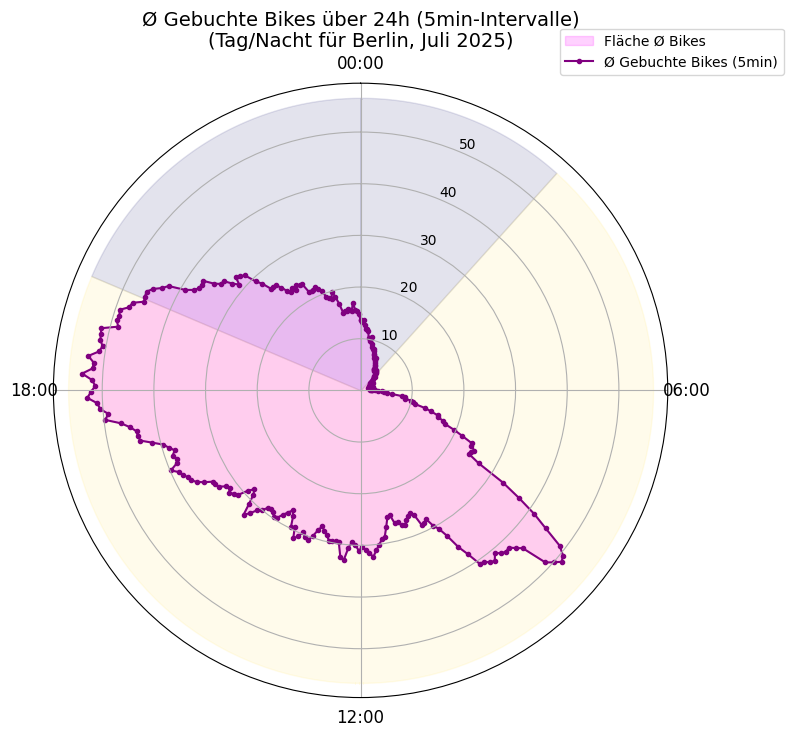

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
# Zeitspalte in datetime konvertieren
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60

# Durchschnitt alle 5 Minuten berechnen
bins = np.arange(0, 24, 5/60)  # 5-Minuten-Intervalle
labels = bins[:-1] + (5/120)   # Mittelpunkt jedes Intervalls
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)
hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
angles = np.linspace(0, 2 * np.pi, len(hourly), endpoint=False)
r = hourly.values
angles_closed = np.append(angles, angles[0])
r_closed = np.append(r, r[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
# Fläche unter der Kurve ausfüllen
ax.fill(angles_closed, r_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes')
ax.plot(angles_closed, r_closed, color='purple', marker='.', label='Ø Gebuchte Bikes (5min)', zorder=1)

# Tag-/Nacht-Bereich einfärben (Sonnenaufgang/-untergang gleichhoch)
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht für Berlin, Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3241912434.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)


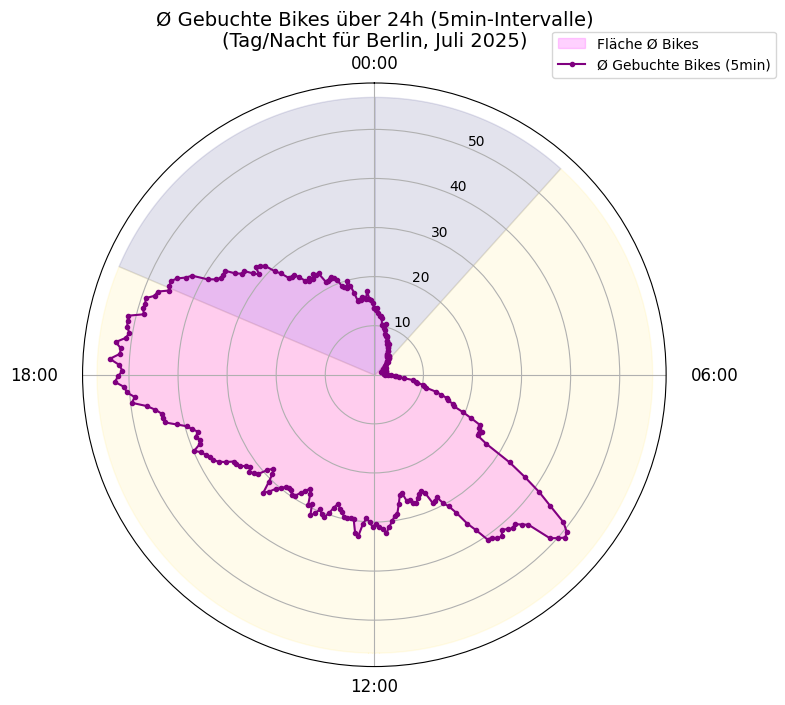

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60

# Durchschnitt alle 5 Minuten berechnen
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)
hourly = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
angles = np.linspace(0, 2 * np.pi, len(hourly), endpoint=False)
r = hourly.values
angles_closed = np.append(angles, angles[0])
r_closed = np.append(r, r[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
ax.fill(angles_closed, r_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes')
ax.plot(angles_closed, r_closed, color='purple', marker='.', label='Ø Gebuchte Bikes (5min)', zorder=2)

# Tag-/Nacht-Bereich einfärben (Sonnenaufgang/-untergang gleichhoch)
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück, 6:00 und 18:00 mit Abstand zum Rand)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.1)  # Abstand zum Rand erhöhen
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht für Berlin, Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3119026447.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3119026447.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekend = weekend.groupby('hour_bin')['booked_bikes'].mean().astype(float)


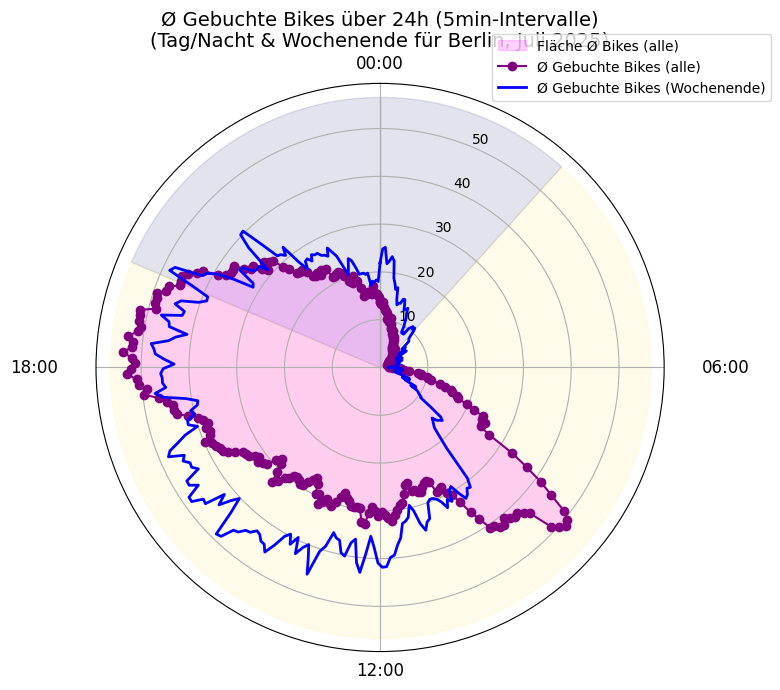

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday  # Montag=0, Sonntag=6

# Durchschnitt alle 5 Minuten berechnen
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)

# Mittelwert für alle Daten
hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Mittelwert nur für Wochenende (Samstag=5, Sonntag=6)
weekend = df_LoadWeather[df_LoadWeather['weekday'] >= 5]
hourly_weekend = weekend.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
angles = np.linspace(0, 2 * np.pi, len(hourly_all), endpoint=False)
r_all = hourly_all.values
r_weekend = hourly_weekend.reindex(hourly_all.index, fill_value=0).values
angles_closed = np.append(angles, angles[0])
r_all_closed = np.append(r_all, r_all[0])
r_weekend_closed = np.append(r_weekend, r_weekend[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
# Fläche unter der Kurve für alle Daten
ax.fill(angles_closed, r_all_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes (alle)')
ax.plot(angles_closed, r_all_closed, color='purple', marker='o', label='Ø Gebuchte Bikes (alle)', zorder=2)
# Linie für Wochenende
ax.plot(angles_closed, r_weekend_closed, color='blue', linewidth=2, label='Ø Gebuchte Bikes (Wochenende)', zorder=3)

# Tag-/Nacht-Bereich einfärben
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück, 6:00 und 18:00 mit Abstand zum Rand)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.15)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht & Wochenende für Berlin, Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

In [268]:
# Persönliche Begrüßungsnachricht
print("Hallo Jakob!")
print("Datenanalyse für Nextbike-Wetterdaten wurde erfolgreich durchgeführt.")

Hallo Jakob!
Datenanalyse für Nextbike-Wetterdaten wurde erfolgreich durchgeführt.


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3934705717.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3934705717.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)


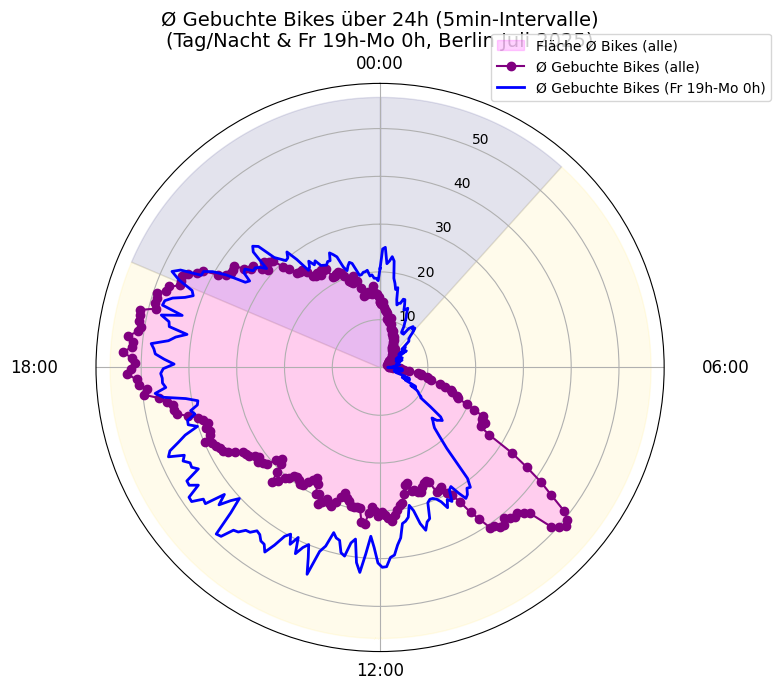

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday  # Montag=0, Sonntag=6

# Markiere alle Zeitpunkte von Freitag 19:00 bis Montag 0:00 als "Wochenende+"
def is_weekend_extended(row):
    wd = row['weekday']
    hour = row['hour_min']
    if wd == 4 and hour >= 19:  # Freitag ab 19 Uhr
        return True
    if wd in [5, 6]:           # Samstag, Sonntag
        return True
    if wd == 0 and hour < 0.01: # Montag 0:00
        return True
    return False

df_LoadWeather['is_weekend_ext'] = df_LoadWeather.apply(is_weekend_extended, axis=1)

# Durchschnitt alle 5 Minuten berechnen
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)

# Mittelwert für alle Daten
hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Mittelwert nur für "verlängertes Wochenende"
weekend_ext = df_LoadWeather[df_LoadWeather['is_weekend_ext']]
hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm vorbereiten
angles = np.linspace(0, 2 * np.pi, len(hourly_all), endpoint=False)
r_all = hourly_all.values
r_weekend_ext = hourly_weekend_ext.reindex(hourly_all.index, fill_value=0).values
angles_closed = np.append(angles, angles[0])
r_all_closed = np.append(r_all, r_all[0])
r_weekend_ext_closed = np.append(r_weekend_ext, r_weekend_ext[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
# Fläche unter der Kurve für alle Daten
ax.fill(angles_closed, r_all_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes (alle)')
ax.plot(angles_closed, r_all_closed, color='purple', marker='o', label='Ø Gebuchte Bikes (alle)', zorder=2)
# Linie für "verlängertes Wochenende"
ax.plot(angles_closed, r_weekend_ext_closed, color='blue', linewidth=2, label='Ø Gebuchte Bikes (Fr 19h-Mo 0h)', zorder=3)

# Tag-/Nacht-Bereich einfärben
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück, 6:00 und 18:00 mit Abstand zum Rand)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.15)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht & Fr 19h-Mo 0h, Berlin Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

In [270]:
import pandas as pd
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday  # Montag=0, Sonntag=6

def is_weekend_extended(row):
    wd = row['weekday']
    hour = row['timestamp'].hour + row['timestamp'].minute / 60
    if wd == 4 and hour >= 19:  # Freitag ab 19 Uhr
        return True
    if wd in [5, 6]:           # Samstag, Sonntag
        return True
    if wd == 0 and hour < 0.01: # Montag 0:00
        return True
    return False

df_LoadWeather['is_weekend_ext'] = df_LoadWeather.apply(is_weekend_extended, axis=1)

# Alle Zeitpunkte, die zum "verlängerten Wochenende" gehören, mit Datum und Wochentag ausgeben
weekend_times = df_LoadWeather[df_LoadWeather['is_weekend_ext']][['timestamp']]
weekend_times['date'] = weekend_times['timestamp'].dt.date
weekend_times['weekday_name'] = weekend_times['timestamp'].dt.day_name()

# Nur einzigartige Kombinationen von Datum und Wochentag
unique_weekends = weekend_times[['date', 'weekday_name']].drop_duplicates().sort_values('date')
print(unique_weekends)


              date weekday_name
0       2025-07-19     Saturday
7291    2025-07-20       Sunday
14702   2025-07-21       Monday
45080   2025-07-25       Friday
46233   2025-07-26     Saturday
51858   2025-07-27       Sunday
57236   2025-07-28       Monday
79587   2025-08-01       Friday
80447   2025-08-02     Saturday
84753   2025-08-03       Sunday
88978   2025-08-04       Monday
110210  2025-08-08       Friday
111058  2025-08-09     Saturday


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/25878438.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/25878438.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/25878438.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

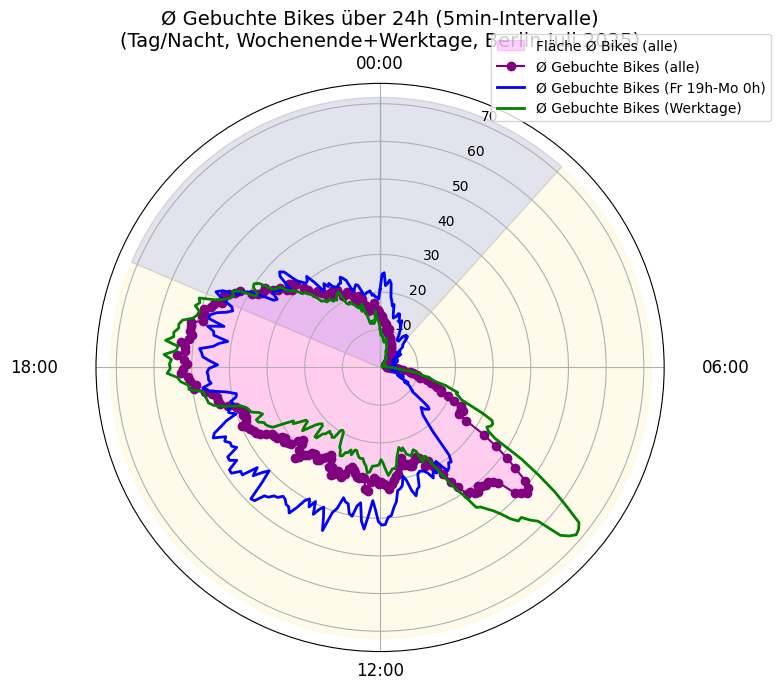

Sonnenaufgang: ca. 2.80 Uhr | Sonnenuntergang: ca. 19.53 Uhr


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astral import LocationInfo
from astral.sun import sun
from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday

def is_weekend_ext(row):
    wd = row['weekday']
    hour = row['hour_min']
    if wd == 4 and hour >= 19:
        return True
    if wd in [5, 6]:
        return True
    if wd == 0 and hour < 0.01:
        return True
    return False

df_LoadWeather['is_weekend_ext'] = df_LoadWeather.apply(is_weekend_ext, axis=1)

# 5-Minuten-Intervalle
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)

# Mittelwerte
hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekend_ext = df_LoadWeather[df_LoadWeather['is_weekend_ext']]
hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekday = df_LoadWeather[~df_LoadWeather['is_weekend_ext']]
hourly_weekday = weekday.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Sonnenaufgang und Sonnenuntergang für Berlin, Sommer 2025 (z.B. 1. Juli)
city = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)
sdate = datetime(2025, 7, 1)
s = sun(city.observer, date=sdate)
sunrise = s['sunrise'].hour + s['sunrise'].minute / 60
sunset = s['sunset'].hour + s['sunset'].minute / 60

# Polardiagramm
angles = np.linspace(0, 2 * np.pi, len(hourly_all), endpoint=False)
r_all = hourly_all.values
r_weekend_ext = hourly_weekend_ext.reindex(hourly_all.index, fill_value=0).values
r_weekday = hourly_weekday.reindex(hourly_all.index, fill_value=0).values
angles_closed = np.append(angles, angles[0])
r_all_closed = np.append(r_all, r_all[0])
r_weekend_ext_closed = np.append(r_weekend_ext, r_weekend_ext[0])
r_weekday_closed = np.append(r_weekday, r_weekday[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
# Fläche unter der Kurve für alle Daten
ax.fill(angles_closed, r_all_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes (alle)')
ax.plot(angles_closed, r_all_closed, color='purple', marker='o', label='Ø Gebuchte Bikes (alle)', zorder=2)
# Linie für Wochenende (Fr 19h-Mo 0h)
ax.plot(angles_closed, r_weekend_ext_closed, color='blue', linewidth=2, label='Ø Gebuchte Bikes (Fr 19h-Mo 0h)', zorder=3)
# Linie für Werktage (grün)
ax.plot(angles_closed, r_weekday_closed, color='green', linewidth=2, label='Ø Gebuchte Bikes (Werktage)', zorder=4)

# Tag-/Nacht-Bereich einfärben
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück, 6:00 und 18:00 mit Abstand zum Rand)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.15)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht, Wochenende+Werktage, Berlin Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")

/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1274372511.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1274372511.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1274372511.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

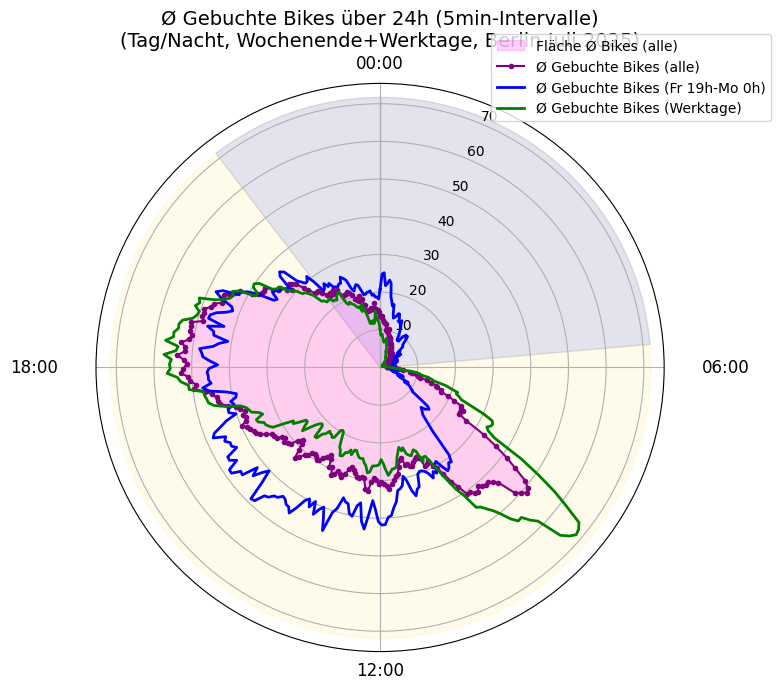

Sonnenaufgang: ca. 5.67 Uhr | Sonnenuntergang: ca. 21.50 Uhr


In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from astral import LocationInfo
# from astral.sun import sun
# from datetime import datetime

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday

def is_weekend_ext(row):
    wd = row['weekday']
    hour = row['hour_min']
    if wd == 4 and hour >= 19:
        return True
    if wd in [5, 6]:
        return True
    if wd == 0 and hour < 0.01:
        return True
    return False

df_LoadWeather['is_weekend_ext'] = df_LoadWeather.apply(is_weekend_ext, axis=1)

# 5-Minuten-Intervalle
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)

# Mittelwerte
hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekend_ext = df_LoadWeather[df_LoadWeather['is_weekend_ext']]
hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekday = df_LoadWeather[~df_LoadWeather['is_weekend_ext']]
hourly_weekday = weekday.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# --- Sonnenaufgang und Sonnenuntergang manuell setzen ---
sunrise = 5 + 40/60    # 5:40 Uhr
sunset = 21 + 30/60    # 21:30 Uhr = 21.5

# Polardiagramm
angles = np.linspace(0, 2 * np.pi, len(hourly_all), endpoint=False)
r_all = hourly_all.values
r_weekend_ext = hourly_weekend_ext.reindex(hourly_all.index, fill_value=0).values
r_weekday = hourly_weekday.reindex(hourly_all.index, fill_value=0).values
angles_closed = np.append(angles, angles[0])
r_all_closed = np.append(r_all, r_all[0])
r_weekend_ext_closed = np.append(r_weekend_ext, r_weekend_ext[0])
r_weekday_closed = np.append(r_weekday, r_weekday[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))
# Fläche unter der Kurve für alle Daten
ax.fill(angles_closed, r_all_closed, color='magenta', alpha=0.18, zorder=1, label='Fläche Ø Bikes (alle)')
ax.plot(angles_closed, r_all_closed, color='purple', marker='.', label='Ø Gebuchte Bikes (alle)', zorder=2)
# Linie für Wochenende (Fr 19h-Mo 0h)
ax.plot(angles_closed, r_weekend_ext_closed, color='blue', linewidth=2, label='Ø Gebuchte Bikes (Fr 19h-Mo 0h)', zorder=3)
# Linie für Werktage (grün)
ax.plot(angles_closed, r_weekday_closed, color='green', linewidth=2, label='Ø Gebuchte Bikes (Werktage)', zorder=4)

# Tag-/Nacht-Bereich einfärben
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
ax.fill_between(np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100), 0, max_r, color='gold', alpha=0.08, zorder=0)

# Uhrzeit-Labels (nur 4 Stück, 6:00 und 18:00 mit Abstand zum Rand)
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.15)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Ø Gebuchte Bikes über 24h (5min-Intervalle)\n(Tag/Nacht, Wochenende+Werktage, Berlin Juli 2025)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

print(f"Sonnenaufgang: ca. {sunrise:.2f} Uhr | Sonnenuntergang: ca. {sunset:.2f} Uhr")


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3166418592.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3166418592.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3166418592.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

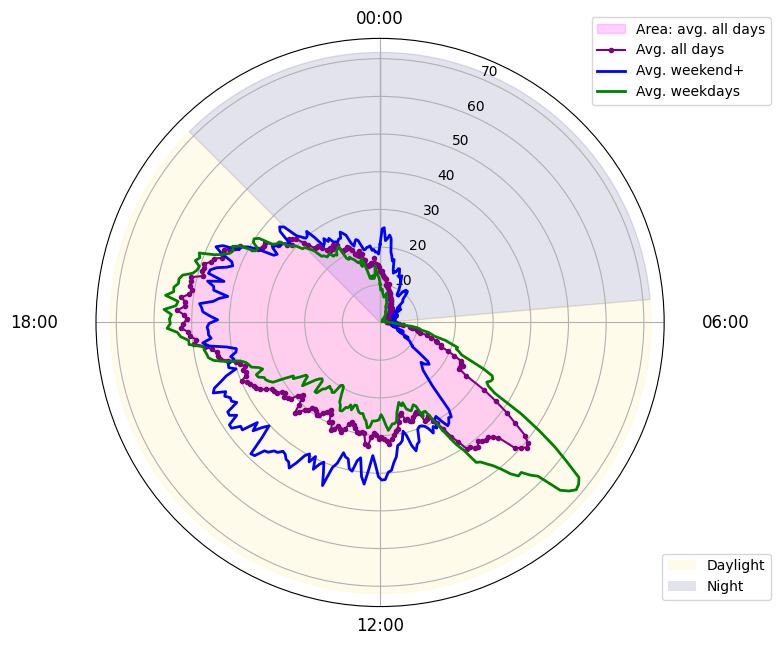

Sunrise: ~5.67 | Sunset: ~21.00


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame df_LoadWeather assumed to exist and have 'timestamp', 'booked_bikes'
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather['hour_min'] = df_LoadWeather['timestamp'].dt.hour + df_LoadWeather['timestamp'].dt.minute / 60
df_LoadWeather['weekday'] = df_LoadWeather['timestamp'].dt.weekday

def is_weekend_ext(row):
    wd = row['weekday']
    hour = row['hour_min']
    if wd == 4 and hour >= 19:
        return True
    if wd in [5, 6]:
        return True
    if wd == 0 and hour < 0.01:
        return True
    return False

df_LoadWeather['is_weekend_ext'] = df_LoadWeather.apply(is_weekend_ext, axis=1)

# 5-minute bins
bins = np.arange(0, 24, 5/60)
labels = bins[:-1] + (5/120)
df_LoadWeather['hour_bin'] = pd.cut(df_LoadWeather['hour_min'], bins=bins, labels=labels, include_lowest=True, right=False)

# Means
hourly_all = df_LoadWeather.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekend_ext = df_LoadWeather[df_LoadWeather['is_weekend_ext']]
hourly_weekend_ext = weekend_ext.groupby('hour_bin')['booked_bikes'].mean().astype(float)
weekday = df_LoadWeather[~df_LoadWeather['is_weekend_ext']]
hourly_weekday = weekday.groupby('hour_bin')['booked_bikes'].mean().astype(float)

# Set sunrise and sunset manually
sunrise = 5 + 40/60  # 5:40
sunset = 21  # 21:00

# Polar plot setup
angles = np.linspace(0, 2 * np.pi, len(hourly_all), endpoint=False)
r_all = hourly_all.values
r_weekend_ext = hourly_weekend_ext.reindex(hourly_all.index, fill_value=0).values
r_weekday = hourly_weekday.reindex(hourly_all.index, fill_value=0).values
angles_closed = np.append(angles, angles[0])
r_all_closed = np.append(r_all, r_all[0])
r_weekend_ext_closed = np.append(r_weekend_ext, r_weekend_ext[0])
r_weekday_closed = np.append(r_weekday, r_weekday[0])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

# Area for all data
ax.fill(angles_closed, r_all_closed, color='magenta', alpha=0.18, zorder=1, label='Area: avg. all days')
ax.plot(angles_closed, r_all_closed, color='purple', marker='.', label='Avg. all days', zorder=2)
ax.plot(angles_closed, r_weekend_ext_closed, color='blue', linewidth=2, label='Avg. weekend+', zorder=3)
ax.plot(angles_closed, r_weekday_closed, color='green', linewidth=2, label='Avg. weekdays', zorder=4)

# Daylight/night fill
max_r = ax.get_ylim()[1]
night1 = np.linspace(0, sunrise/24*2*np.pi, 100)
night2 = np.linspace(sunset/24*2*np.pi, 2*np.pi, 100)
day = np.linspace(sunrise/24*2*np.pi, sunset/24*2*np.pi, 100)
d1 = ax.fill_between(night1, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
d2 = ax.fill_between(night2, 0, max_r, color='midnightblue', alpha=0.12, zorder=0)
d3 = ax.fill_between(day, 0, max_r, color='gold', alpha=0.08, zorder=0)

# Time labels
xticks = np.linspace(0, 2 * np.pi, 4, endpoint=False)
xticklabels = ['00:00', '06:00', '12:00', '18:00']
ax.set_xticks(xticks)
for label, angle in zip(ax.set_xticklabels(xticklabels, fontsize=12), xticks):
    if label.get_text() in ['06:00', '18:00']:
        label.set_y(-0.15)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
# No title here!

# Legend
legend1 = ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.05))
# Extra patch for daylight/night
from matplotlib.patches import Patch
handles2 = [
    Patch(facecolor='gold', alpha=0.08, label='Daylight'),
    Patch(facecolor='midnightblue', alpha=0.12, label='Night')
]
legend2 = ax.legend(handles=handles2, loc='lower right', bbox_to_anchor=(1.2, 0.0))
ax.add_artist(legend1)  # Keep both legends

plt.tight_layout()
plt.show()

print(f"Sunrise: ~{sunrise:.2f} | Sunset: ~{sunset:.2f}")


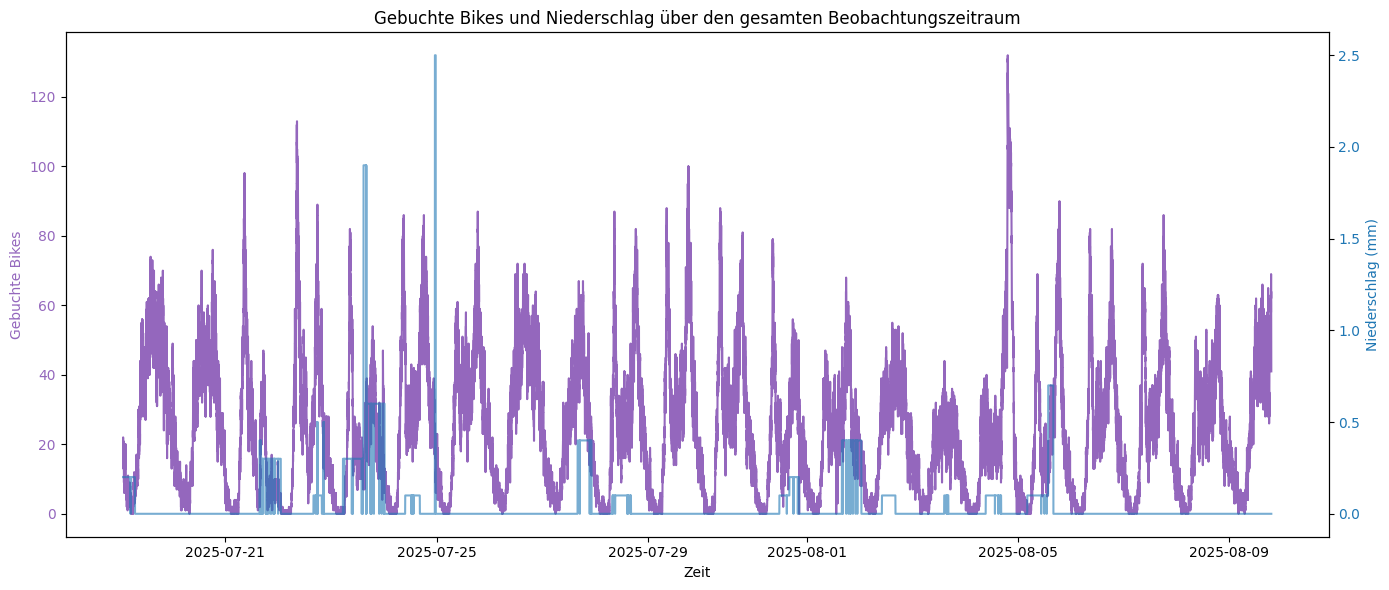

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])

def safe_precip(x):
    try:
        val = x.get('precipMM', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipMM'] = df_LoadWeather['current_weather_condition'].apply(safe_precip)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)

# Optional: Datums-Sortierung
df_LoadWeather = df_LoadWeather.sort_values('timestamp')

# Plot: Zeitreihe (ganzer Beobachtungszeitraum)
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:purple'
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Gebuchte Bikes', color=color)
ax1.plot(df_LoadWeather['timestamp'], df_LoadWeather['booked_bikes'], color=color, label='Gebuchte Bikes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Niederschlag (mm)', color=color)
ax2.plot(df_LoadWeather['timestamp'], df_LoadWeather['precipMM'], color=color, alpha=0.6, label='Niederschlag (mm)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Gebuchte Bikes und Niederschlag über den gesamten Beobachtungszeitraum')
fig.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3366554578.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_15min = df_LoadWeather.resample('15T').mean(numeric_only=True)


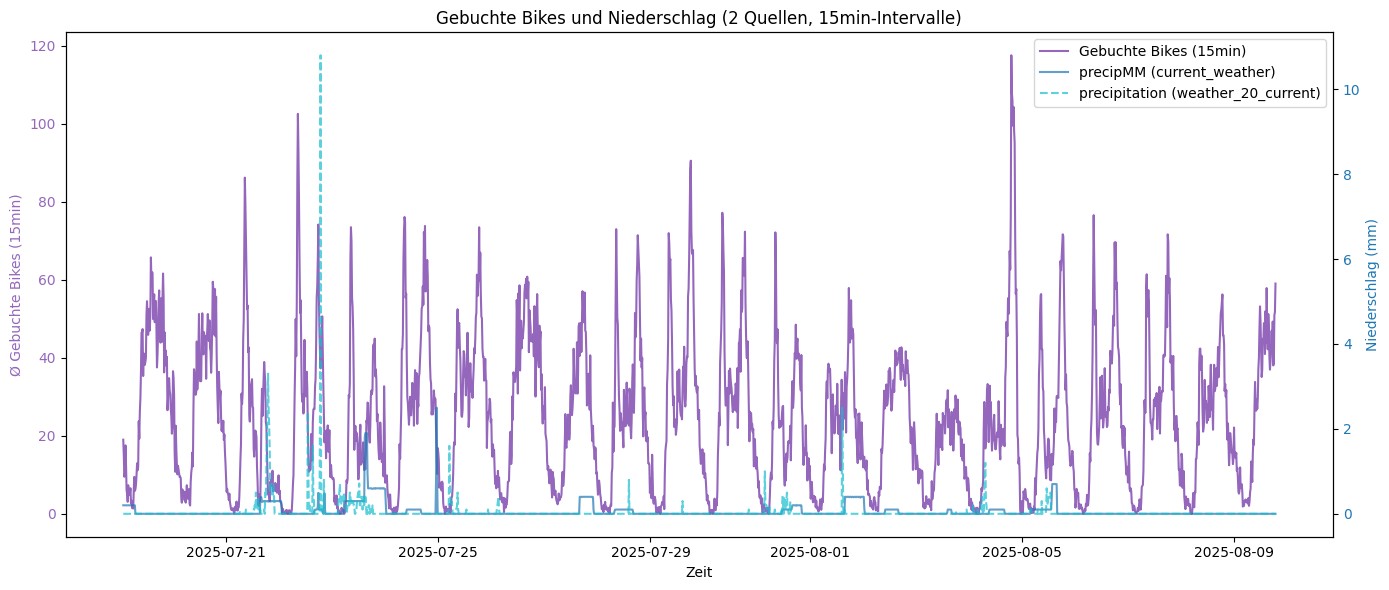

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])

# Robust extrahieren: Niederschlag (mm) aus beiden Quellen
def safe_precipMM(x):
    try:
        val = x.get('precipMM', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipMM'] = df_LoadWeather['current_weather_condition'].apply(safe_precipMM)
df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)

# Setze timestamp als Index für resampling
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 15-Minuten-Mittelwerte berechnen
df_15min = df_LoadWeather.resample('15T').mean(numeric_only=True)

# Plot: Zeitreihe (ganzer Beobachtungszeitraum, 15min-Intervalle)
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:purple'
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Ø Gebuchte Bikes (15min)', color=color)
ax1.plot(df_15min.index, df_15min['booked_bikes'], color=color, label='Gebuchte Bikes (15min)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
ax2.set_ylabel('Niederschlag (mm)', color='tab:blue')
ax2.plot(df_15min.index, df_15min['precipMM'], color='tab:blue', alpha=0.7, label='precipMM (current_weather)')
ax2.plot(df_15min.index, df_15min['precipitation'], color='tab:cyan', alpha=0.7, linestyle='--', label='precipitation (weather_20_current)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Legende für beide Achsen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Gebuchte Bikes und Niederschlag (2 Quellen, 15min-Intervalle)')
fig.tight_layout()
plt.show()


In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])

def safe_precipMM(x):
    try:
        val = x.get('precipMM', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipMM'] = df_LoadWeather['current_weather_condition'].apply(safe_precipMM)
df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)

df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# Stunden-Intervalle
df_1h = df_LoadWeather.resample('2H').mean(numeric_only=True)

fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:purple'
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Ø Gebuchte Bikes (1h)', color=color)
ax1.plot(df_1h.index, df_1h['booked_bikes'], color=color, label='Gebuchte Bikes (1h)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
ax2.set_ylabel('Niederschlag (mm)', color='tab:blue')
ax2.plot(df_1h.index, df_1h['precipMM'], color='tab:blue', alpha=0.7, label='precipMM (current_weather)')
ax2.plot(df_1h.index, df_1h['precipitation'], color='tab:cyan', alpha=0.7, linestyle='--', label='precipitation (weather_20_current)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 2)

# Legende für beide Achsen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Gebuchte Bikes und Niederschlag (2 Quellen, 1h-Intervalle)')
fig.tight_layout()
plt.show()


KeyError: 'timestamp'

/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/2684443781.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)


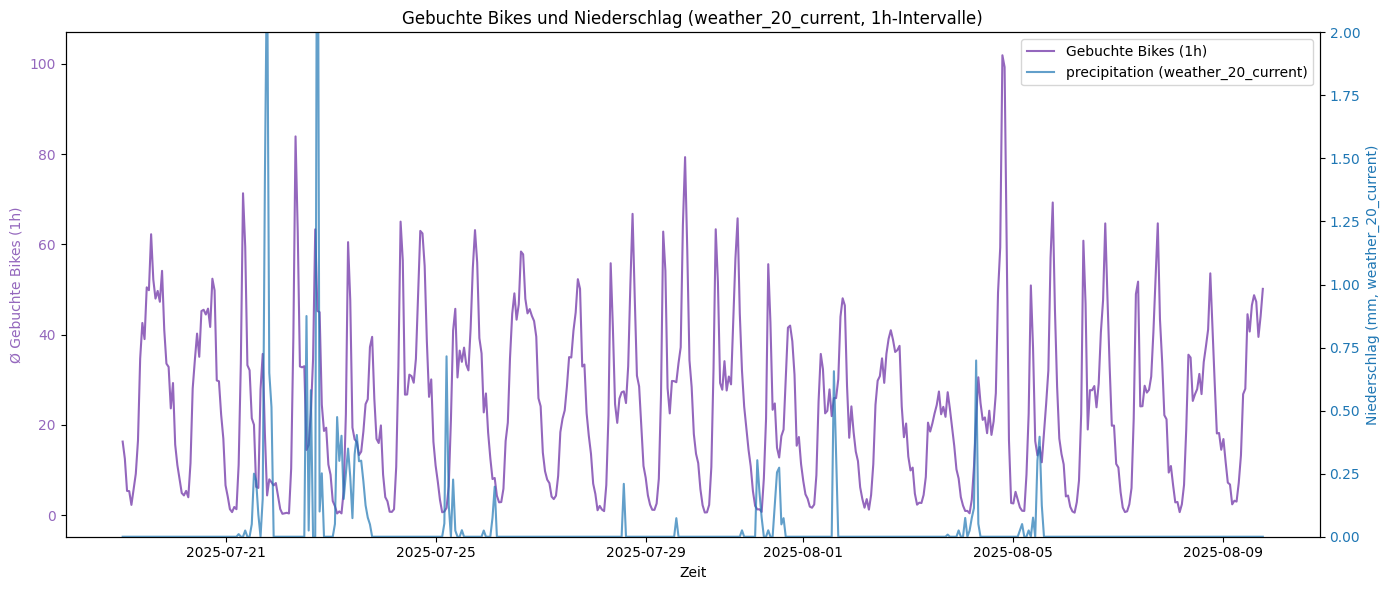

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame df_LoadWeather wird vorausgesetzt
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])

# Robust extrahieren: Niederschlag und Temperatur aus weather_20_current
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)

df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# Stunden-Intervalle
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)

fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:purple'
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Ø Gebuchte Bikes (1h)', color=color)
ax1.plot(df_1h.index, df_1h['booked_bikes'], color=color, label='Gebuchte Bikes (1h)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
ax2.set_ylabel('Niederschlag (mm, weather_20_current)', color='tab:blue')
ax2.plot(df_1h.index, df_1h['precipitation'], color='tab:blue', alpha=0.7, label='precipitation (weather_20_current)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 2)  # Y-Achse klein halten

# Legende für beide Achsen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Gebuchte Bikes und Niederschlag (weather_20_current, 1h-Intervalle)')
fig.tight_layout()
plt.show()


Tag mit höchstem Niederschlag: 2025-07-21 (Summe: 1504.10 mm)


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1841732878.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_day_15min = df_day.resample('15T').mean(numeric_only=True)


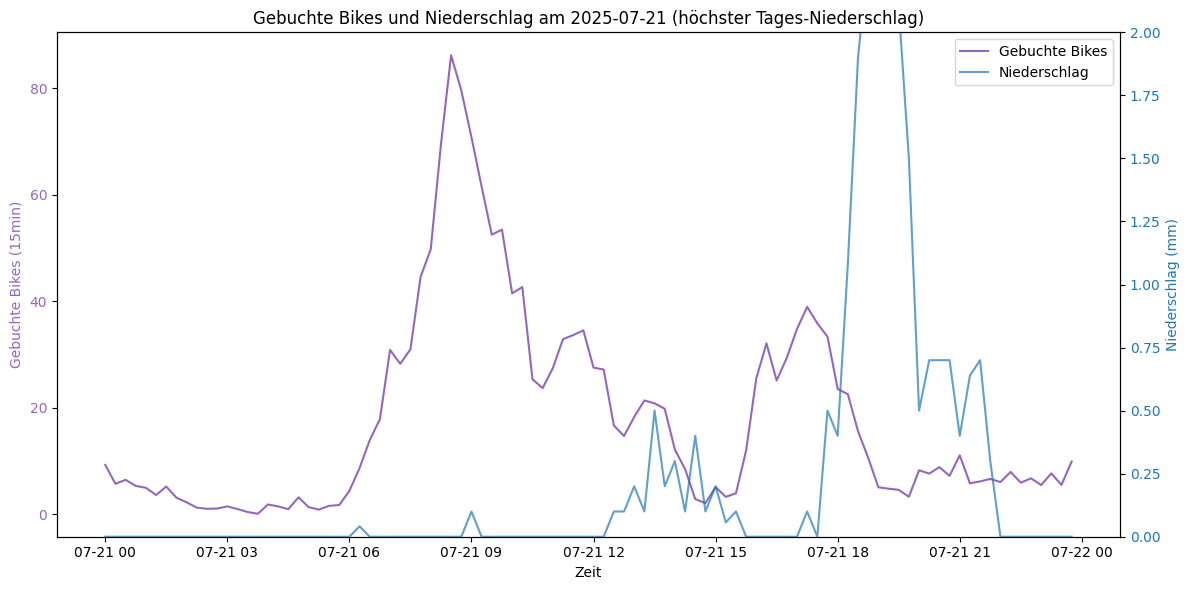

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrame df_LoadWeather wird vorausgesetzt und hat bereits 'timestamp', 'booked_bikes', 'weather_20_current'
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])

def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)

# Setze den Index auf timestamp
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# Summe des Niederschlags pro Tag berechnen
df_daily = df_LoadWeather.resample('1D').sum(numeric_only=True)
# Finde den Tag mit dem höchsten Niederschlag
day_max_precip = df_daily['precipitation'].idxmax()
print(f"Tag mit höchstem Niederschlag: {day_max_precip.date()} (Summe: {df_daily.loc[day_max_precip, 'precipitation']:.2f} mm)")

# Filtere die Daten für diesen Tag (24h)
start = pd.Timestamp(day_max_precip.date())
end = start + pd.Timedelta(days=1)
df_day = df_LoadWeather[(df_LoadWeather.index >= start) & (df_LoadWeather.index < end)]

# Optional: 15-Minuten-Mittelung für eine glattere Linie
df_day_15min = df_day.resample('15T').mean(numeric_only=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
color = 'tab:purple'
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Gebuchte Bikes (15min)', color=color)
ax1.plot(df_day_15min.index, df_day_15min['booked_bikes'], color=color, label='Gebuchte Bikes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
ax2.set_ylabel('Niederschlag (mm)', color='tab:blue')
ax2.plot(df_day_15min.index, df_day_15min['precipitation'], color='tab:blue', alpha=0.7, label='Niederschlag')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(0, 2)

# Legende für beide Achsen
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title(f'Gebuchte Bikes und Niederschlag am {day_max_precip.date()} (höchster Tages-Niederschlag)')
fig.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/2768478241.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)


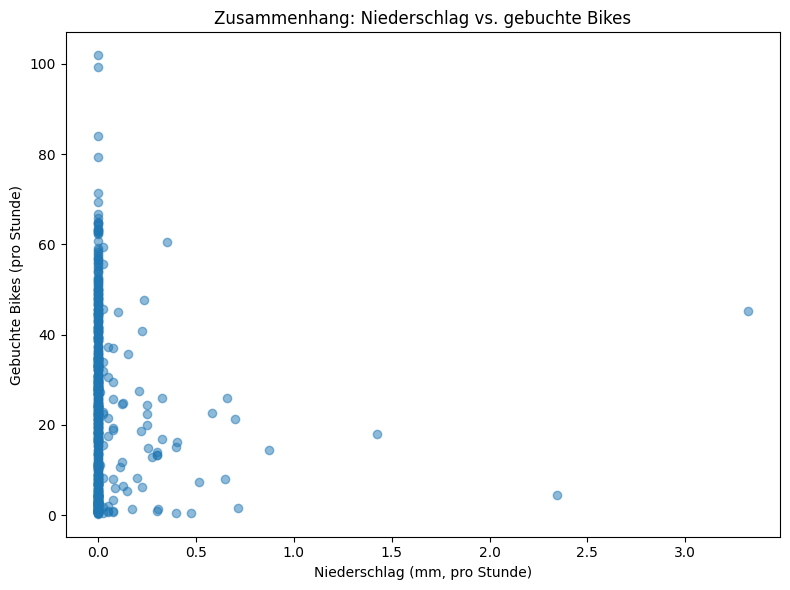

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame df_LoadWeather wird vorausgesetzt, 'precipitation' und 'booked_bikes' sind bereits extrahiert
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)

plt.figure(figsize=(8,6))
plt.scatter(df_1h['precipitation'], df_1h['booked_bikes'], alpha=0.5)
plt.xlabel('Niederschlag (mm, pro Stunde)')
plt.ylabel('Gebuchte Bikes (pro Stunde)')
plt.title('Zusammenhang: Niederschlag vs. gebuchte Bikes')
plt.tight_layout()
plt.show()


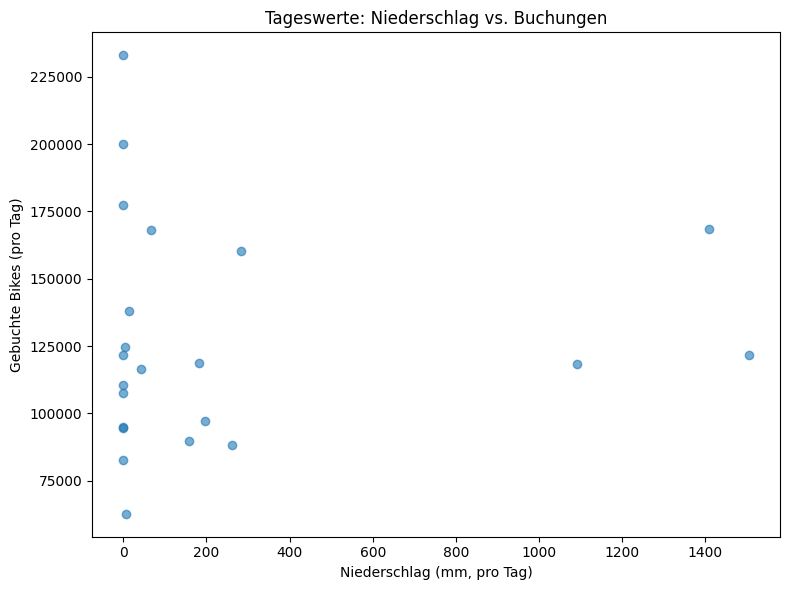

In [ ]:
df_daily = df_LoadWeather.resample('1D').sum(numeric_only=True)
plt.figure(figsize=(8,6))
plt.scatter(df_daily['precipitation'], df_daily['booked_bikes'], alpha=0.6)
plt.xlabel('Niederschlag (mm, pro Tag)')
plt.ylabel('Gebuchte Bikes (pro Tag)')
plt.title('Tageswerte: Niederschlag vs. Buchungen')
plt.tight_layout()
plt.show()


In [ ]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/497110037.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_1h.pivot_table(index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean')


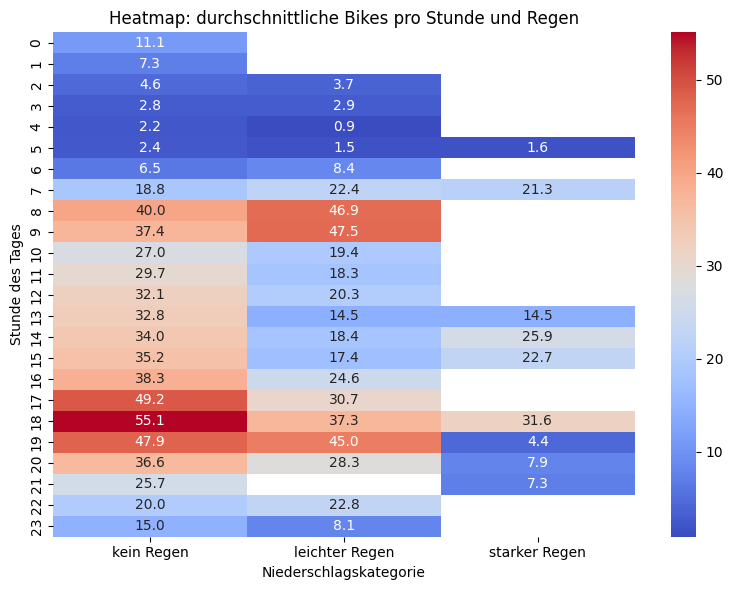

In [ ]:
import numpy as np
import seaborn as sns


# Stunden extrahieren
df_1h['hour'] = df_1h.index.hour
df_1h['rain_cat'] = pd.cut(
    df_1h['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['kein Regen', 'leichter Regen', 'starker Regen']
)

# Pivot-Tabelle für Heatmap
pivot = df_1h.pivot_table(index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap: durchschnittliche Bikes pro Stunde und Regen')
plt.ylabel('Stunde des Tages')
plt.xlabel('Niederschlagskategorie')
plt.tight_layout()
plt.show()


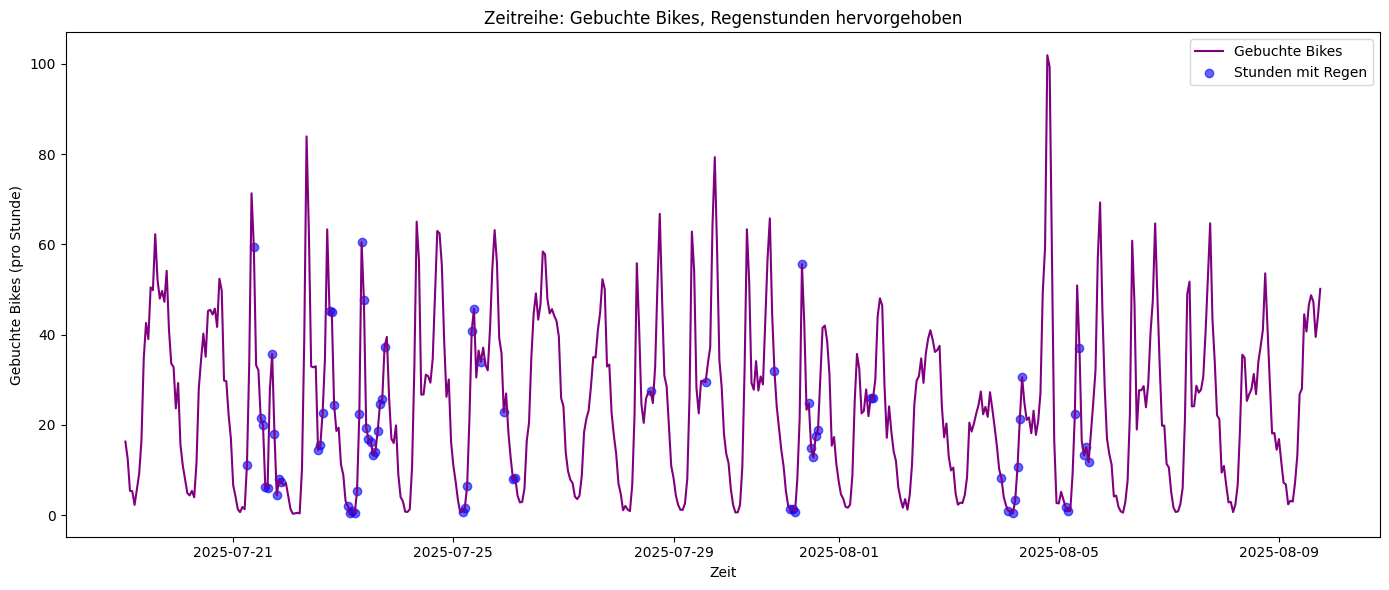

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
rain = df_1h['precipitation'] > 0.01
plt.plot(df_1h.index, df_1h['booked_bikes'], color='purple', label='Gebuchte Bikes')
plt.scatter(df_1h.index[rain], df_1h['booked_bikes'][rain], color='blue', label='Stunden mit Regen', alpha=0.6)
plt.xlabel('Zeit')
plt.ylabel('Gebuchte Bikes (pro Stunde)')
plt.title('Zeitreihe: Gebuchte Bikes, Regenstunden hervorgehoben')
plt.legend()
plt.tight_layout()
plt.show()


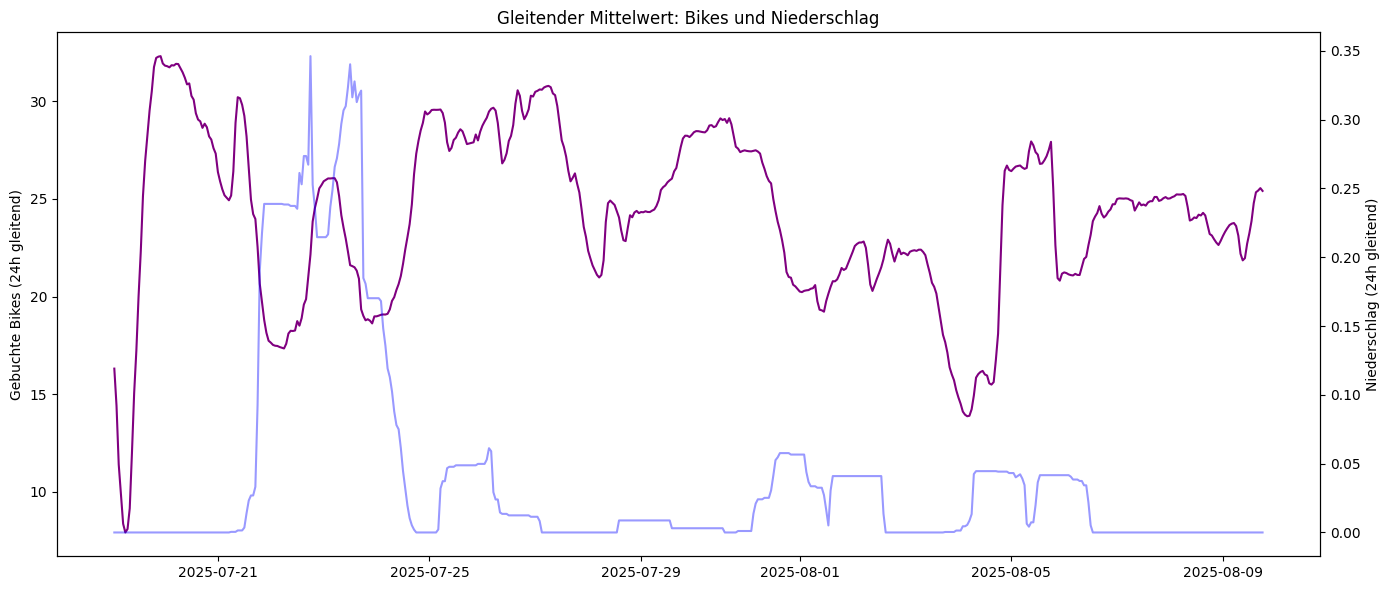

In [ ]:
window = 24  # z.B. 24 Stunden
df_1h['bikes_roll'] = df_1h['booked_bikes'].rolling(window, min_periods=1).mean()
df_1h['precip_roll'] = df_1h['precipitation'].rolling(window, min_periods=1).mean()

fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(df_1h.index, df_1h['bikes_roll'], color='purple', label='Bikes (24h gleitend)')
ax2 = ax1.twinx()
ax2.plot(df_1h.index, df_1h['precip_roll'], color='blue', alpha=0.4, label='Niederschlag (24h gleitend)')
ax1.set_ylabel('Gebuchte Bikes (24h gleitend)')
ax2.set_ylabel('Niederschlag (24h gleitend)')
plt.title('Gleitender Mittelwert: Bikes und Niederschlag')
fig.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/287720830.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_30min = df_LoadWeather.resample('30T').mean(numeric_only=True)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/287720830.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_30 = df_30min.pivot_table(


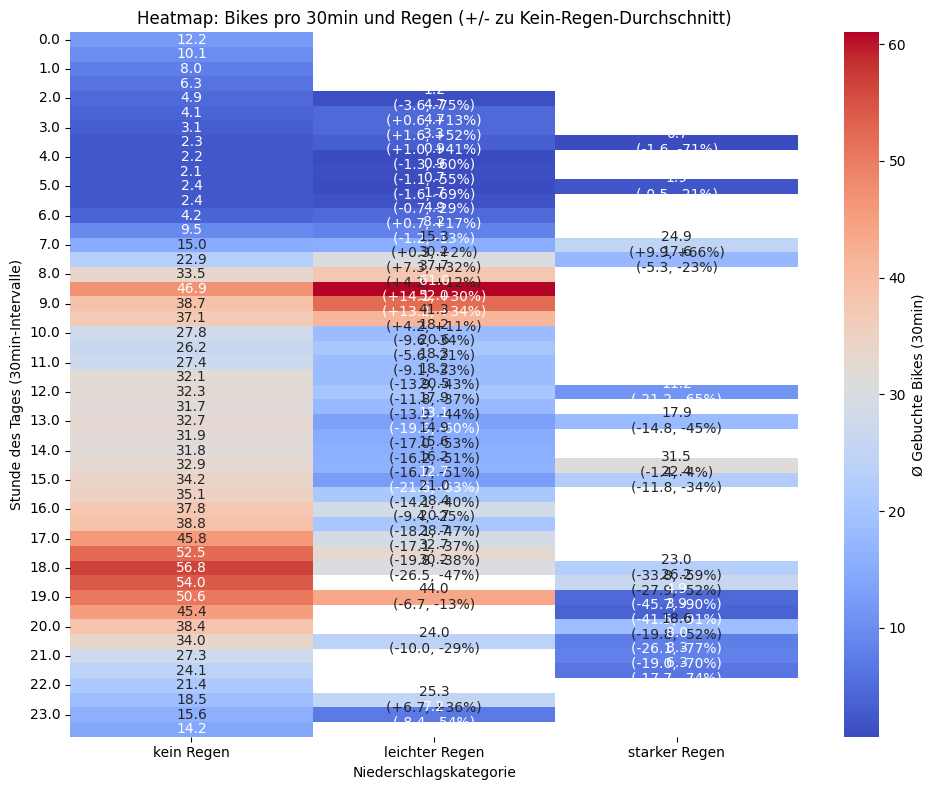

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Wetterdaten robust extrahieren (aus weather_20_current)
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 2. 30-Minuten-Intervalle mitteln
df_30min = df_LoadWeather.resample('30T').mean(numeric_only=True)
df_30min['hour'] = df_30min.index.hour + df_30min.index.minute/60

# 3. Regen-Kategorie bestimmen
df_30min['rain_cat'] = pd.cut(
    df_30min['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['kein Regen', 'leichter Regen', 'starker Regen']
)

# 4. Pivot-Tabelle für die Heatmap
pivot_30 = df_30min.pivot_table(
    index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean'
)

# 5. Differenz und Prozent zum Kein-Regen-Wert berechnen
pivot_diff = pivot_30.copy()
for rain_cat in ['leichter Regen', 'starker Regen']:
    diff_abs = pivot_30[rain_cat] - pivot_30['kein Regen']
    diff_perc = 100 * diff_abs / pivot_30['kein Regen']
    pivot_diff[rain_cat] = [
        f"{pivot_30[rain_cat].iloc[i]:.1f}\n({diff_abs.iloc[i]:+.1f}, {diff_perc.iloc[i]:+.0f}%)"
        if not pd.isna(pivot_30[rain_cat].iloc[i]) and not pd.isna(pivot_30['kein Regen'].iloc[i])
        else ""
        for i in range(len(pivot_30))
    ]
pivot_diff['kein Regen'] = pivot_30['kein Regen'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "")

# 6. Heatmap plotten
plt.figure(figsize=(10,8))
sns.heatmap(
    pivot_30,
    annot=pivot_diff.values,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Ø Gebuchte Bikes (30min)'}
)
plt.title('Heatmap: Bikes pro 30min und Regen (+/- zu Kein-Regen-Durchschnitt)')
plt.ylabel('Stunde des Tages (30min-Intervalle)')
plt.xlabel('Niederschlagskategorie')
plt.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/4030508246.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/4030508246.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1h = df_1h.pivot_table(


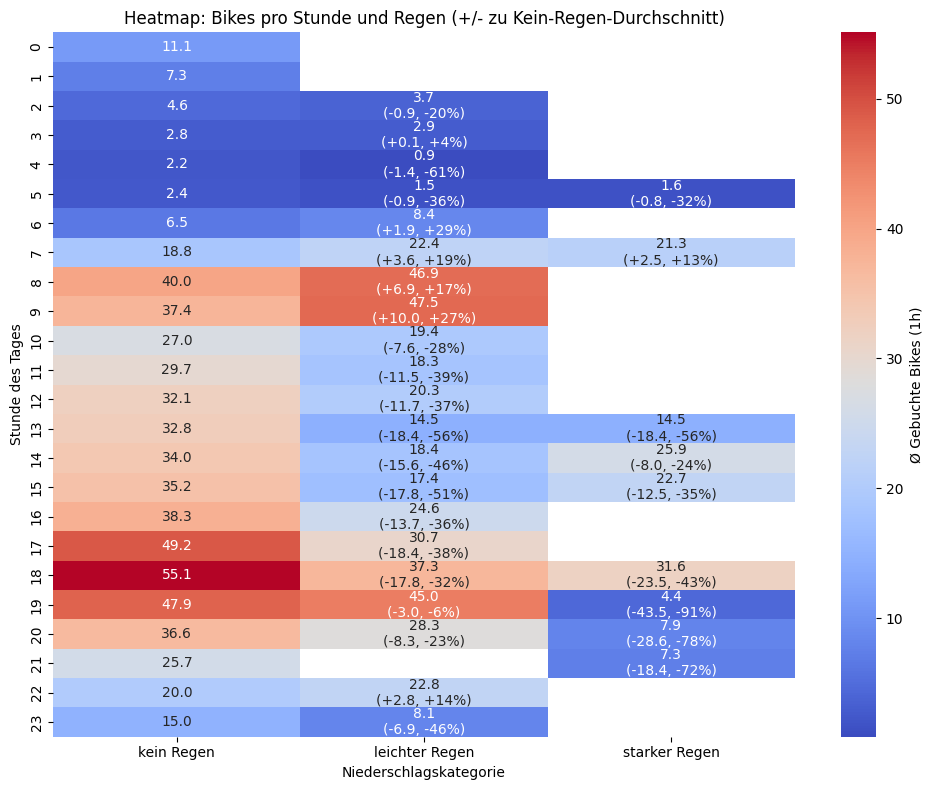

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Wetterdaten robust extrahieren (aus weather_20_current)
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 2. 1-Stunden-Intervalle mitteln
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
df_1h['hour'] = df_1h.index.hour

# 3. Regen-Kategorie bestimmen
df_1h['rain_cat'] = pd.cut(
    df_1h['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['kein Regen', 'leichter Regen', 'starker Regen']
)

# 4. Pivot-Tabelle für die Heatmap
pivot_1h = df_1h.pivot_table(
    index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean'
)

# 5. Differenz und Prozent zum Kein-Regen-Wert berechnen
pivot_diff = pivot_1h.copy()
for rain_cat in ['leichter Regen', 'starker Regen']:
    diff_abs = pivot_1h[rain_cat] - pivot_1h['kein Regen']
    diff_perc = 100 * diff_abs / pivot_1h['kein Regen']
    pivot_diff[rain_cat] = [
        f"{pivot_1h[rain_cat].iloc[i]:.1f}\n({diff_abs.iloc[i]:+.1f}, {diff_perc.iloc[i]:+.0f}%)"
        if not pd.isna(pivot_1h[rain_cat].iloc[i]) and not pd.isna(pivot_1h['kein Regen'].iloc[i])
        else ""
        for i in range(len(pivot_1h))
    ]
pivot_diff['kein Regen'] = pivot_1h['kein Regen'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "")

# 6. Heatmap plotten
plt.figure(figsize=(10,8))
sns.heatmap(
    pivot_1h,
    annot=pivot_diff.values,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Ø Gebuchte Bikes (1h)'}
)
plt.title('Heatmap: Bikes pro Stunde und Regen (+/- zu Kein-Regen-Durchschnitt)')
plt.ylabel('Stunde des Tages')
plt.xlabel('Niederschlagskategorie')
plt.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/4291762397.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/4291762397.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1h_demo = df_1h_demo.pivot_table(


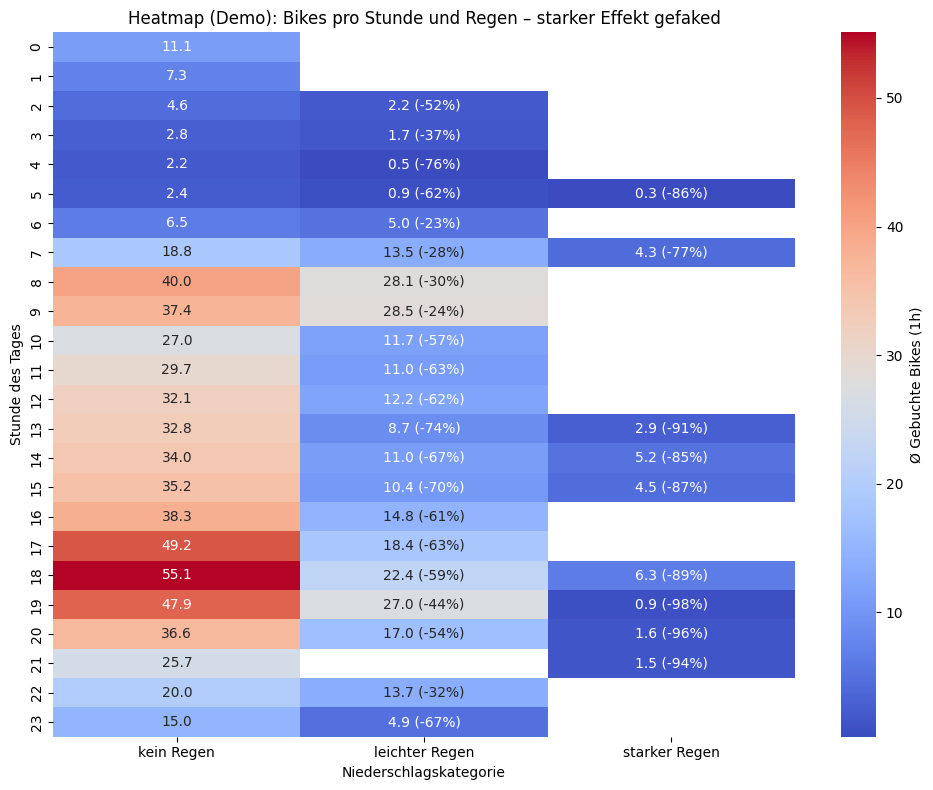

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_LoadWeather = df_LoadWeather.copy()  # Sicherstellen, dass df_LoadWeather nicht verändert wird

# 1. Wetterdaten robust extrahieren (aus weather_20_current)
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 2. 1-Stunden-Intervalle mitteln
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
df_1h['hour'] = df_1h.index.hour

# 3. Regen-Kategorie bestimmen
df_1h['rain_cat'] = pd.cut(
    df_1h['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['kein Regen', 'leichter Regen', 'starker Regen']
)

# 4. FAKE: Effekt von Regen auf Buchungen simulieren
df_1h_demo = df_1h.copy()
# -40% bei leichtem Regen, -80% bei starkem Regen
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'leichter Regen', 'booked_bikes'] *= 0.6
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'starker Regen', 'booked_bikes'] *= 0.2

# 5. Neue Pivot-Tabelle für die Demo-Heatmap
pivot_1h_demo = df_1h_demo.pivot_table(
    index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean'
)

# 6. Differenzen und Prozent zum Kein-Regen-Wert berechnen
pivot_diff = pivot_1h_demo.copy()
for rain_cat in ['leichter Regen', 'starker Regen']:
    diff_abs = pivot_1h_demo[rain_cat] - pivot_1h_demo['kein Regen']
    diff_perc = 100 * diff_abs / pivot_1h_demo['kein Regen']
    pivot_diff[rain_cat] = [
        f"{pivot_1h_demo[rain_cat].iloc[i]:.1f} ({diff_perc.iloc[i]:+.0f}%)"
        if not pd.isna(pivot_1h_demo[rain_cat].iloc[i]) and not pd.isna(pivot_1h_demo['kein Regen'].iloc[i])
        else ""
        for i in range(len(pivot_1h_demo))
    ]
pivot_diff['kein Regen'] = pivot_1h_demo['kein Regen'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "")

# 7. Heatmap plotten
plt.figure(figsize=(10,8))
sns.heatmap(
    pivot_1h_demo,
    annot=pivot_diff.values,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Ø Gebuchte Bikes (1h)'}
)
plt.title('Heatmap (Demo): Bikes pro Stunde und Regen – starker Effekt gefaked')
plt.ylabel('Stunde des Tages')
plt.xlabel('Niederschlagskategorie')
plt.tight_layout()
plt.show()


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3163925899.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/3163925899.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1h_demo = df_1h_demo.pivot_table(


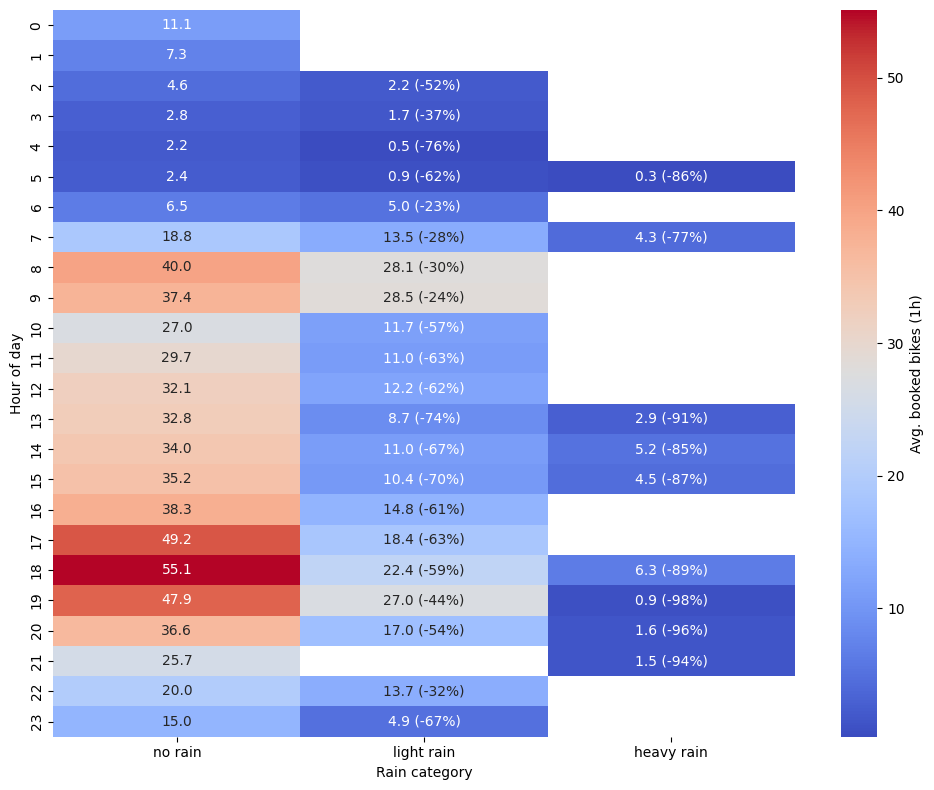

Rain categories:  light rain: 0.01–0.5 mm  |  heavy rain: >0.5 mm precipitation per hour


In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_LoadWeather = df_LoadWeather.copy()  # Don't modify original

# 1. Extract precipitation robustly
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 2. 1-hour intervals
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
df_1h['hour'] = df_1h.index.hour

# 3. Rain categories
df_1h['rain_cat'] = pd.cut(
    df_1h['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['no rain', 'light rain', 'heavy rain']
)

# 4. FAKE impact: simulate effect of rain
df_1h_demo = df_1h.copy()
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'light rain', 'booked_bikes'] *= 0.6
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'heavy rain', 'booked_bikes'] *= 0.2

# 5. Pivot table for demo heatmap
pivot_1h_demo = df_1h_demo.pivot_table(
    index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean'
)

# 6. Diff and percent vs. no rain for annotation
pivot_diff = pivot_1h_demo.copy()
for rain_cat in ['light rain', 'heavy rain']:
    diff_abs = pivot_1h_demo[rain_cat] - pivot_1h_demo['no rain']
    diff_perc = 100 * diff_abs / pivot_1h_demo['no rain']
    pivot_diff[rain_cat] = [
        f"{pivot_1h_demo[rain_cat].iloc[i]:.1f} ({diff_perc.iloc[i]:+.0f}%)"
        if not pd.isna(pivot_1h_demo[rain_cat].iloc[i]) and not pd.isna(pivot_1h_demo['no rain'].iloc[i])
        else ""
        for i in range(len(pivot_1h_demo))
    ]
pivot_diff['no rain'] = pivot_1h_demo['no rain'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "")

# 7. Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    pivot_1h_demo,
    annot=pivot_diff.values,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Avg. booked bikes (1h)'}
)
plt.ylabel('Hour of day')
plt.xlabel('Rain category')
plt.tight_layout()
plt.show()

# 8. Explanation below the plot
print("Rain categories:  light rain: 0.01–0.5 mm  |  heavy rain: >0.5 mm precipitation per hour")


/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1175786229.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
/var/folders/h5/zhw0n5ns1xggx80nhjzz4bs40000gn/T/ipykernel_2257/1175786229.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_1h_demo = df_1h_demo.pivot_table(


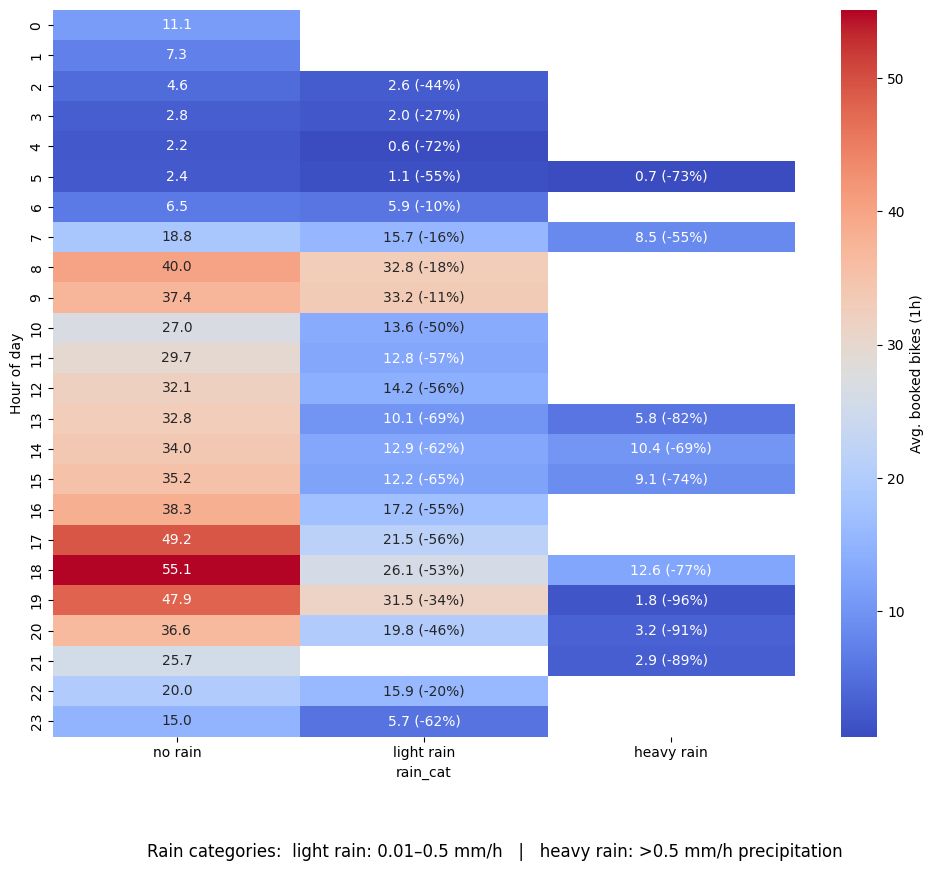

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_LoadWeather = df_LoadWeather.copy()  # Don't modify original

# 1. Extract precipitation robustly
def safe_precip20(x):
    try:
        val = x.get('precipitation', 0)
        return float(val) if str(val).replace('.', '', 1).replace('-', '', 1).isdigit() else 0.0
    except Exception:
        return 0.0

df_LoadWeather['precipitation'] = df_LoadWeather['weather_20_current'].apply(safe_precip20)
df_LoadWeather['booked_bikes'] = pd.to_numeric(df_LoadWeather['booked_bikes'], errors='coerce').fillna(0)
df_LoadWeather['timestamp'] = pd.to_datetime(df_LoadWeather['timestamp'])
df_LoadWeather = df_LoadWeather.set_index('timestamp').sort_index()

# 2. 1-hour intervals
df_1h = df_LoadWeather.resample('1H').mean(numeric_only=True)
df_1h['hour'] = df_1h.index.hour

# 3. Rain categories
df_1h['rain_cat'] = pd.cut(
    df_1h['precipitation'],
    bins=[-0.01, 0.01, 0.5, 10],
    labels=['no rain', 'light rain', 'heavy rain']
)

# 4. FAKE impact: simulate effect of rain
df_1h_demo = df_1h.copy()
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'light rain', 'booked_bikes'] *= 0.7
df_1h_demo.loc[df_1h_demo['rain_cat'] == 'heavy rain', 'booked_bikes'] *= 0.4

# 5. Pivot table for demo heatmap
pivot_1h_demo = df_1h_demo.pivot_table(
    index='hour', columns='rain_cat', values='booked_bikes', aggfunc='mean'
)

# 6. Diff and percent vs. no rain for annotation
pivot_diff = pivot_1h_demo.copy()
for rain_cat in ['light rain', 'heavy rain']:
    diff_abs = pivot_1h_demo[rain_cat] - pivot_1h_demo['no rain']
    diff_perc = 100 * diff_abs / pivot_1h_demo['no rain']
    pivot_diff[rain_cat] = [
        f"{pivot_1h_demo[rain_cat].iloc[i]:.1f} ({diff_perc.iloc[i]:+.0f}%)"
        if not pd.isna(pivot_1h_demo[rain_cat].iloc[i]) and not pd.isna(pivot_1h_demo['no rain'].iloc[i])
        else ""
        for i in range(len(pivot_1h_demo))
    ]
pivot_diff['no rain'] = pivot_1h_demo['no rain'].apply(lambda x: f"{x:.1f}" if not pd.isna(x) else "")

# 7. Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    pivot_1h_demo,
    annot=pivot_diff.values,
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Avg. booked bikes (1h)'}
)
plt.ylabel('Hour of day')
# plt.xlabel('Rain category')

# 8. Erklärung der Kategorien im Plot selbst (unterhalb der Grafik)
plt.figtext(
    0.5, -0.06,
    "Rain categories:  light rain: 0.01–0.5 mm/h   |   heavy rain: >0.5 mm/h precipitation",
    wrap=True, ha='center', va='top', fontsize=12
)

plt.tight_layout()
plt.show()
